In [69]:
from pathlib import Path

import xarray as xr
import cartopy.crs as ccrs

DATAPATH = Path.home() / "Data" / "ERA5" / "single_level"
HOURLY_FILEPATH = DATAPATH / "hourly" / "era5.precipitation.hourly.nc"
MONTHLY_FILEPATH = DATAPATH / "monthly" / "era5.monthly.precipitation.nc"

In [17]:
ds = xr.open_dataset(HOURLY_FILEPATH).drop_vars(["number", "expver"])
ds

<xarray.Dataset> Size: 2GB
Dimensions:     (valid_time: 744, latitude: 281, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 6kB 2025-01-01 ... 2025-01-31T23:...
  * latitude    (latitude) float64 2kB 90.0 89.75 89.5 89.25 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 12kB -180.0 -179.8 -179.5 ... 179.5 179.8
Data variables:
    tp          (valid_time, latitude, longitude) float32 1GB ...
    sf          (valid_time, latitude, longitude) float32 1GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-10T16:27 GRIB to CDM+CF via cfgrib-0.9.1...

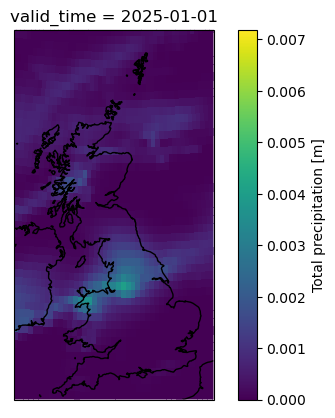

In [35]:
p = ds.tp.isel(valid_time=0).plot(
    subplot_kws={
        "projection": ccrs.OSGB(),
        },
    transform=ccrs.PlateCarree()
    )
p.axes.coastlines()

From the [ERA5 wiki](https://confluence.ecmwf.int/display/CKB/ERA5%3A+data+documentation#heading-Meanratesfluxesandaccumulations):

> reanalysis: accumulations are over the hour (the accumulation/processing period) ending at the validity date/time

So for monthly statistics summing needs to start at YYYY-MM-01T01:00:00 and end at YYYY-MM+1-01T00:00:00

In [68]:
ds_day = ds.resample(valid_time="D", offset="1h").sum().sel(valid_time="2025").mean()  #.mean(dim="valid_time")
ds_day

<xarray.Dataset> Size: 16B
Dimensions:  ()
Data variables:
    tp       float64 8B 0.001787
    sf       float64 8B 0.0006172

In [60]:
ds_day.valid_time  #isel(valid_time=0)

<xarray.DataArray 'valid_time' (valid_time: 32)> Size: 256B
array(['2024-12-31T01:00:00.000000000', '2025-01-01T01:00:00.000000000',
       '2025-01-02T01:00:00.000000000', '2025-01-03T01:00:00.000000000',
       '2025-01-04T01:00:00.000000000', '2025-01-05T01:00:00.000000000',
       '2025-01-06T01:00:00.000000000', '2025-01-07T01:00:00.000000000',
       '2025-01-08T01:00:00.000000000', '2025-01-09T01:00:00.000000000',
       '2025-01-10T01:00:00.000000000', '2025-01-11T01:00:00.000000000',
       '2025-01-12T01:00:00.000000000', '2025-01-13T01:00:00.000000000',
       '2025-01-14T01:00:00.000000000', '2025-01-15T01:00:00.000000000',
       '2025-01-16T01:00:00.000000000', '2025-01-17T01:00:00.000000000',
       '2025-01-18T01:00:00.000000000', '2025-01-19T01:00:00.000000000',
       '2025-01-20T01:00:00.000000000', '2025-01-21T01:00:00.000000000',
       '2025-01-22T01:00:00.000000000', '2025-01-23T01:00:00.000000000',
       '2025-01-24T01:00:00.000000000', '2025-01-25T01:00:00.000000000',
       '2025-01-26T01:00:00.000000000', '2025-01-27T01:00:00.000000000',
       '2025-01-28T01:00:00.000000000', '2025-01-29T01:00:00.000000000',
       '2025-01-30T01:00:00.000000000', '2025-01-31T01:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 256B 2024-12-31T01:00:00 ... 2025...
Attributes:
    long_name:      time
    standard_name:  time

In [42]:
latitude, longitude = 53.47169044247251, -2.2460828368637236  #53.5, -2.25
tp = ds.tp.sel(
    longitude=longitude, 
    latitude=latitude, 
    method="nearest"
)

(0.0, 0.007)

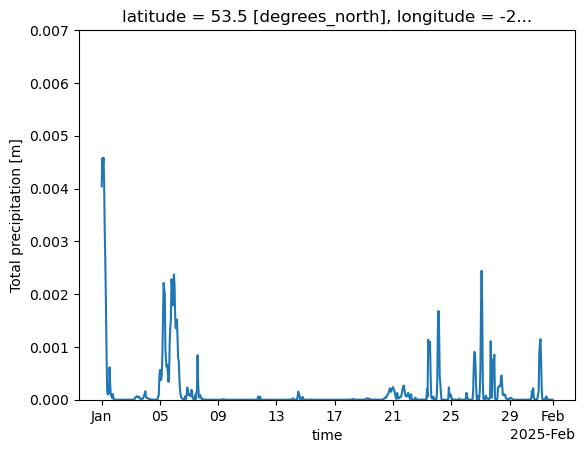

In [43]:
pl = tp.plot()
pl[0].axes.set_ylim(0., 0.007)

In [63]:
for i, (t, v) in enumerate(zip(
    tp.isel(valid_time=slice(None,27)).valid_time.values,
    tp.isel(valid_time=slice(None,27)).values)):
    print(f"{i} {t} {v}")

0 2025-01-01T00:00:00.000000000 0.004040718078613281
1 2025-01-01T01:00:00.000000000 0.004572868347167969
2 2025-01-01T02:00:00.000000000 0.004435062408447266
3 2025-01-01T03:00:00.000000000 0.004578113555908203
4 2025-01-01T04:00:00.000000000 0.004122734069824219
5 2025-01-01T05:00:00.000000000 0.003215789794921875
6 2025-01-01T06:00:00.000000000 0.0025844573974609375
7 2025-01-01T07:00:00.000000000 0.0018129348754882812
8 2025-01-01T08:00:00.000000000 0.0008549690246582031
9 2025-01-01T09:00:00.000000000 0.00018739700317382812
10 2025-01-01T10:00:00.000000000 0.00010061264038085938
11 2025-01-01T11:00:00.000000000 0.00017547607421875
12 2025-01-01T12:00:00.000000000 0.0001277923583984375
13 2025-01-01T13:00:00.000000000 0.0006136894226074219
14 2025-01-01T14:00:00.000000000 0.00028324127197265625
15 2025-01-01T15:00:00.000000000 8.487701416015625e-05
16 2025-01-01T16:00:00.000000000 7.724761962890625e-05
17 2025-01-01T17:00:00.000000000 3.337860107421875e-05
18 2025-01-01T18:00:00.00

In [64]:
tp.isel(valid_time=slice(1,24)).sum()

<xarray.DataArray 'tp' ()> Size: 4B
array(0.02802563, dtype=float32)
Coordinates:
    latitude   float64 8B 53.5
    longitude  float64 8B -2.25

In [67]:
ds_day.sel(valid_time="2025-01-01", longitude=-2.25, latitude=53.5)

<xarray.Dataset> Size: 32B
Dimensions:     (valid_time: 1)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 8B 2025-01-01T01:00:00
    latitude    float64 8B 53.5
    longitude   float64 8B -2.25
Data variables:
    tp          (valid_time) float32 4B 0.02803
    sf          (valid_time) float32 4B 0.0
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-10-10T16:27 GRIB to CDM+CF via cfgrib-0.9.1...

In [70]:
ds_month = xr.open_dataset(MONTHLY_FILEPATH)
ds_month

<xarray.Dataset> Size: 5GB
Dimensions:     (valid_time: 557, latitude: 721, longitude: 1440)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 4kB 1979-01-01T06:00:00 ... 2025-...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number      int64 8B ...
    expver      (valid_time) <U4 9kB ...
Data variables:
    tp          (valid_time, latitude, longitude) float32 2GB ...
    sf          (valid_time, latitude, longitude) float32 2GB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-27T22:43 GRIB to CDM+CF via cfgrib-0.9.1...

In [103]:
ds_month.tp.sel(
    valid_time="2025-01-01", 
    latitude=53.5, 
    longitude=360-2.25,
    # method="nearest",
).values * 31

array([0.1148262], dtype=float32)

In [101]:
ds_hour_to_month = ds.resample(valid_time="D", offset="1h").sum().sel(valid_time="2025").mean(dim="valid_time")

In [102]:
ds_hour_to_month.sel(
    latitude=latitude, 
    longitude=longitude,
    method="nearest",
).values

<bound method Mapping.values of <xarray.Dataset> Size: 24B
Dimensions:    ()
Coordinates:
    latitude   float64 8B 53.5
    longitude  float64 8B -2.25
Data variables:
    tp         float32 4B 0.003705
    sf         float32 4B 0.0006635>